In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
df=pd.read_csv("/content/Covid_Dataset.csv")

## Iniatl analysis

In [ ]:
df.head()

,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,1,1,03-05-2020,3,1,65,2,0,0,0,0,1,0,0,0,0,0,3,0
1,1,2,1,03-06-2020,3,1,72,3,0,0,0,0,1,0,0,1,1,0,5,0
2,1,2,2,09-06-2020,1,2,55,3,1,0,0,0,0,0,0,0,0,0,3,1
3,1,1,1,12-06-2020,3,2,53,2,0,0,0,0,0,0,0,0,0,0,7,0
4,1,2,1,21-06-2020,3,2,68,3,1,0,0,0,1,0,0,0,0,0,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   MEDICAL_UNIT          199999 non-null  int64 
 1   SEX                   199999 non-null  int64 
 2   PATIENT_TYPE          199999 non-null  int64 
 3   DATE_DIED             199999 non-null  object
 4   INTUBED               199999 non-null  int64 
 5   PNEUMONIA             199999 non-null  int64 
 6   AGE                   199999 non-null  int64 
 7   PREGNANT              199999 non-null  int64 
 8   DIABETES              199999 non-null  int64 
 9   COPD                  199999 non-null  int64 
 10  ASTHMA                199999 non-null  int64 
 11  INMSUPR               199999 non-null  int64 
 12  HIPERTENSION          199999 non-null  int64 
 13  OTHER_DISEASE         199999 non-null  int64 
 14  CARDIOVASCULAR        199999 non-null  int64 
 15  OBESITY          

In [ ]:
df.shape

(199999, 20)

In [ ]:
df.drop("USMER", axis=1, inplace=True)

KeyError: "['USMER'] not found in axis"

In [ ]:
df1.head()

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,1,3,1,65,2,0,0,0,0,1,0,0,0,0,0,3,0
1,2,1,3,1,72,3,0,0,0,0,1,0,0,1,1,0,5,0
2,2,2,1,2,55,3,1,0,0,0,0,0,0,0,0,0,3,1
3,1,1,3,2,53,2,0,0,0,0,0,0,0,0,0,0,7,0
4,2,1,3,2,68,3,1,0,0,0,1,0,0,0,0,0,3,0


In [ ]:
df1.columns

Index(['SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

<Axes: xlabel='PNEUMONIA'>

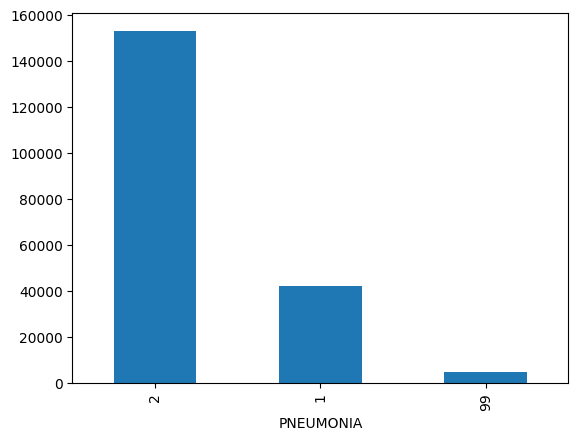

In [ ]:
df1['PNEUMONIA'].value_counts().plot.bar()

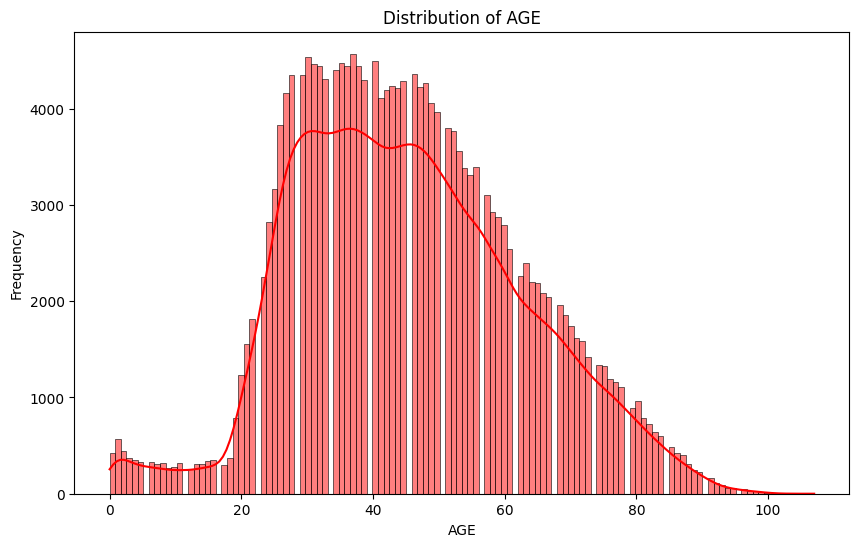

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df1["AGE"].dropna(),kde=True,color="red")
plt.title("Distribution of AGE")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.show()



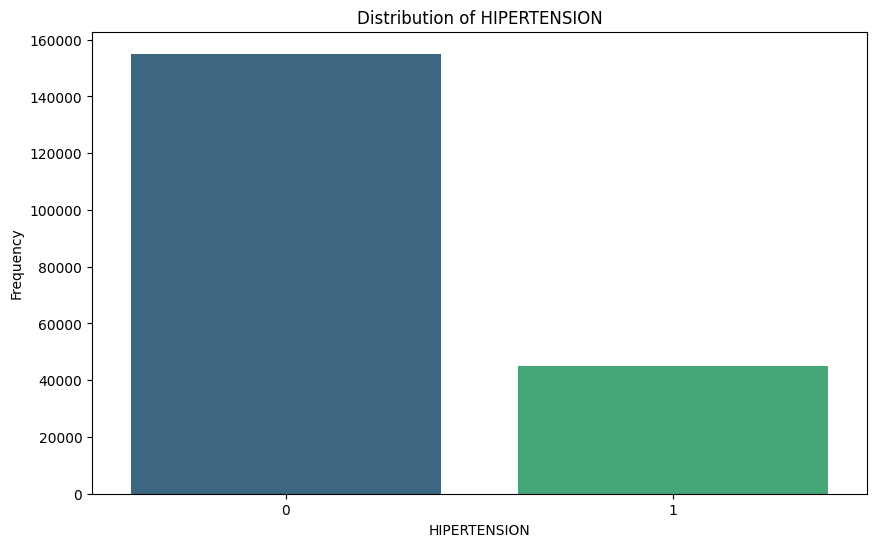

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='HIPERTENSION',data=df,palette="viridis")
plt.title("Distribution of HIPERTENSION")
plt.xlabel("HIPERTENSION")
plt.ylabel("Frequency")
plt.show()

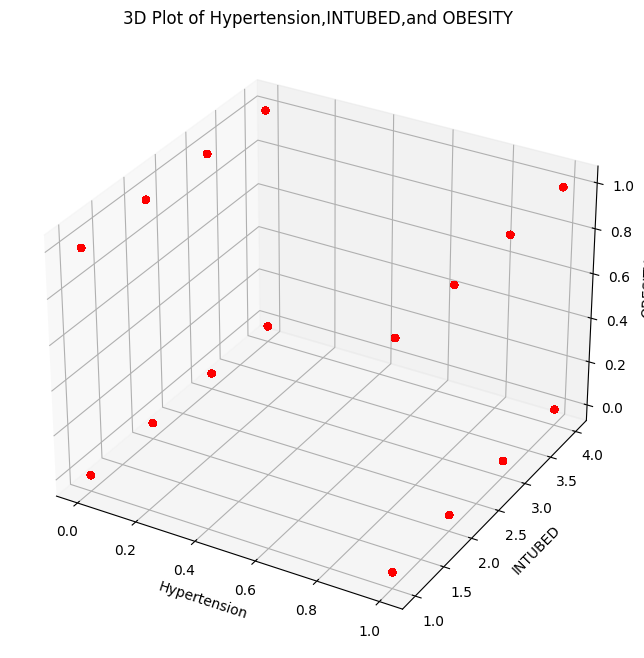

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection="3d")
x=df1['HIPERTENSION']
y = df1['INTUBED']
z=df1['OBESITY']
scatter = ax.scatter(x, y, z, c="r", marker='o')
ax.set_xlabel("Hypertension")
ax.set_ylabel("INTUBED")
ax.set_zlabel('OBESITY')
plt.title("3D Plot of Hypertension,INTUBED,and OBESITY")
plt.show()

<Axes: xlabel='INMSUPR'>

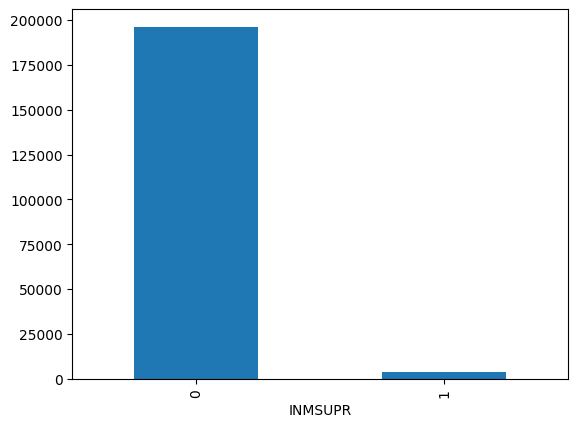

In [ ]:
df1 [  'INMSUPR'].value_counts().plot.bar()



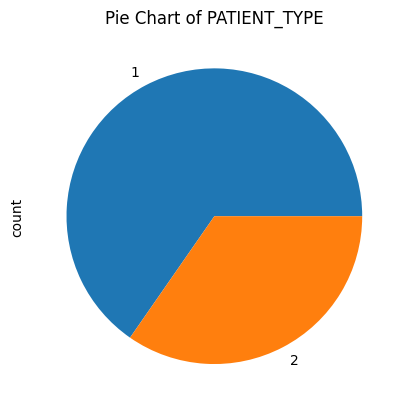

In [ ]:
df1 ['PATIENT_TYPE'].value_counts().plot.pie()
plt.title('Pie Chart of PATIENT_TYPE')
plt.show()

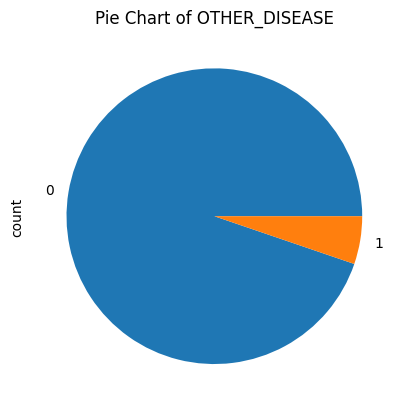

In [ ]:
df1 ['OTHER_DISEASE'].value_counts().plot.pie()
plt.title('Pie Chart of OTHER_DISEASE')
plt.show()

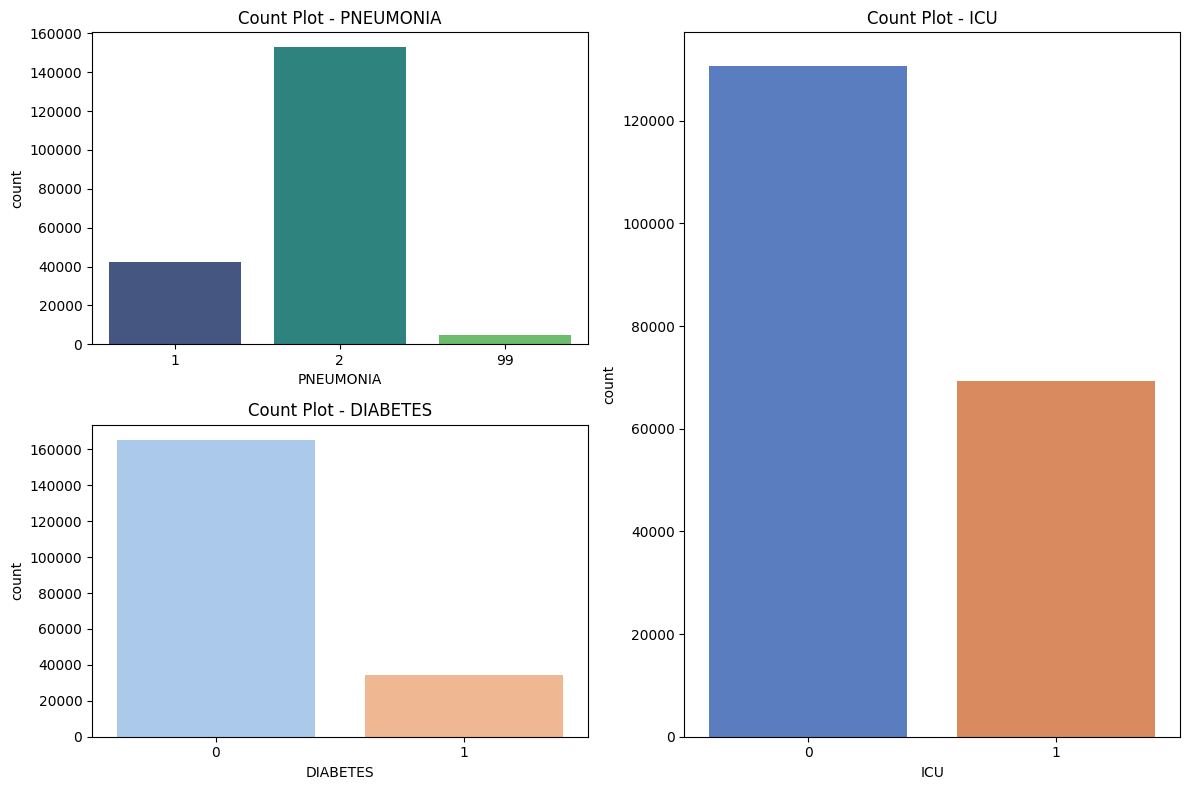

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='PNEUMONIA', data=df1, palette='viridis')
plt.title('Count Plot - PNEUMONIA')

plt.subplot(2, 2, 2)
sns.countplot(x='HIPERTENSION', data=df1, palette='muted')
plt.title('Count Plot - HIPERTENSION')

plt.subplot(2, 2, 3)
sns.countplot(x='DIABETES', data=df1, palette='pastel')
plt.title('Count Plot - DIABETES')

plt.subplot(1, 2, 2)
sns.countplot(x='ICU', data=df1, palette='muted')
plt.title('Count Plot - ICU')
plt.tight_layout()
plt.show()

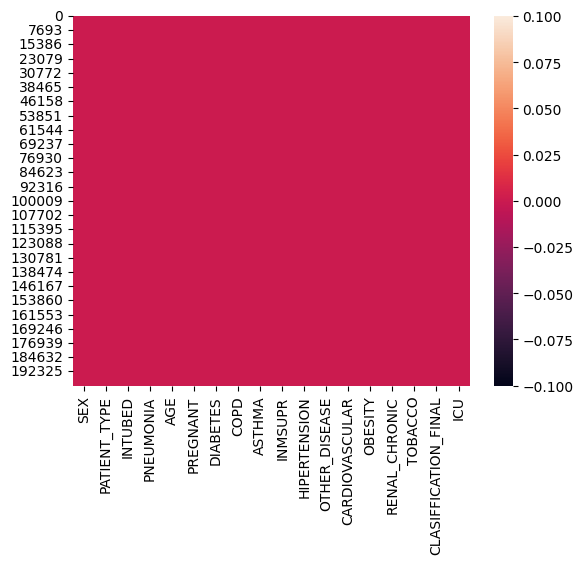

In [ ]:
sns.heatmap(df1.isnull())
plt.show()

In [ ]:
df1.describe()

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,1.523433,1.346587,2.578108,4.095105,45.317002,2.518763,0.172966,0.021925,0.031865,0.018795,0.224771,0.052340,0.025855,0.176846,0.032410,0.076065,4.006060,0.346587
std,0.499452,0.475884,0.656066,14.817906,17.262120,0.512581,0.378219,0.146439,0.175641,0.135801,0.417433,0.222713,0.158703,0.381539,0.177087,0.265103,1.517395,0.475884
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,2.000000,32.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2.000000,1.000000,3.000000,2.000000,44.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,2.000000,2.000000,3.000000,2.000000,57.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,2.000000,2.000000,4.000000,99.000000,107.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


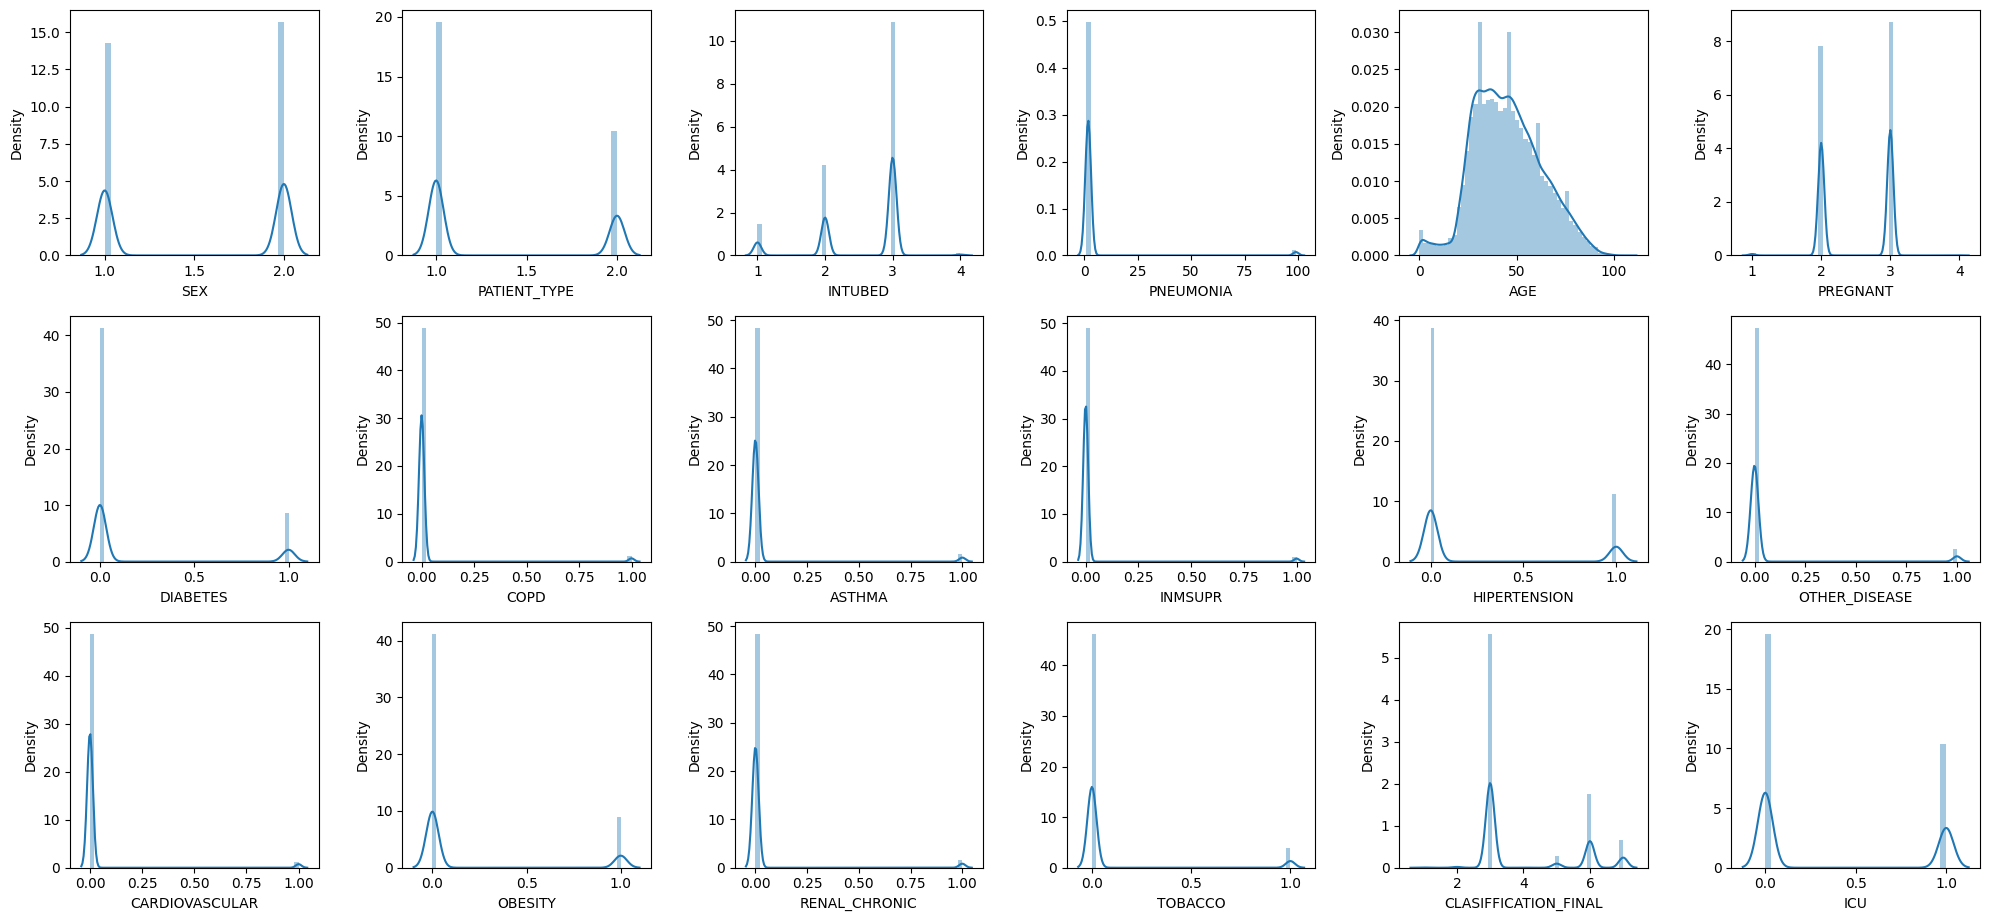

In [ ]:
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: ylabel='AGE'>

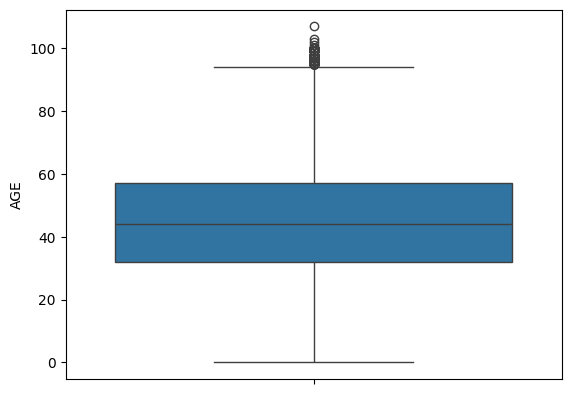

In [ ]:
sns.boxplot(df1['AGE'])

In [ ]:
q2 = df1['AGE'].quantile(0.25)
q3 = df1['AGE'].quantile(0.75)
IQR = q3-q2

In [ ]:
lower_fence = q2 - 1.5*IQR
upper_fence = q3 + 1.5*IQR

In [ ]:
lower_fence, upper_fence

(-5.5, 94.5)

In [ ]:
df1.loc[df1['AGE'] > upper_fence, 'AGE'] = upper_fence

In [ ]:
df1[df1['AGE'] == upper_fence]

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
283,2,1,3,2,94.5,3,0,0,0,0,0,0,0,0,0,0,7,0
1103,2,2,2,1,94.5,3,0,0,0,0,0,1,0,0,0,0,6,1
1202,1,2,2,1,94.5,2,0,0,0,0,0,0,0,0,0,0,7,1
1241,2,1,3,1,94.5,3,0,0,0,0,0,0,0,0,0,0,3,0
1376,1,2,2,1,94.5,2,1,0,0,0,1,0,0,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184460,1,2,2,2,94.5,2,0,0,1,0,0,0,0,0,0,0,6,1
191926,2,1,3,2,94.5,3,0,0,0,0,1,0,0,0,0,0,6,0
192208,2,1,3,2,94.5,3,0,1,0,0,1,0,1,0,0,0,6,0
196815,1,1,3,1,94.5,2,0,0,0,0,0,1,0,0,0,0,6,0


In [ ]:
X=df1.drop(columns="CLASIFFICATION_FINAL")
X

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
0,1,1,3,1,65.0,2,0,0,0,0,1,0,0,0,0,0,0
1,2,1,3,1,72.0,3,0,0,0,0,1,0,0,1,1,0,0
2,2,2,1,2,55.0,3,1,0,0,0,0,0,0,0,0,0,1
3,1,1,3,2,53.0,2,0,0,0,0,0,0,0,0,0,0,0
4,2,1,3,2,68.0,3,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1,1,3,2,27.0,2,0,0,0,0,0,0,0,0,0,0,0
199995,1,1,3,2,42.0,2,0,0,0,0,0,0,0,0,0,0,0
199996,2,1,3,2,57.0,3,0,0,0,0,0,0,0,0,0,1,0
199997,1,2,2,2,45.0,2,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X.shape

(199999, 17)

In [ ]:
y=df1[["CLASIFFICATION_FINAL"]]
y

,CLASIFFICATION_FINAL
0,3
1,5
2,3
3,7
4,3
...,...
199994,6
199995,6
199996,6
199997,6


In [ ]:
y=to_categorical(y,num_classes=7)

IndexError: index 7 is out of bounds for axis 1 with size 7